## Part 2: Clinical Application

### Contents
Fill out this notebook as part 2 of your final project submission.

**You will have to complete the Code (Load Metadata & Compute Resting Heart Rate) and Project Write-up sections.**  

- [Code](#Code) is where you will implement some parts of the **pulse rate algorithm** you created and tested in Part 1 and already includes the starter code.
  - [Imports](#Imports) - These are the imports needed for Part 2 of the final project. 
    - [glob](https://docs.python.org/3/library/glob.html)
    - [os](https://docs.python.org/3/library/os.html)
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
  - [Load the Dataset](#Load-the-dataset)  
  - [Load Metadata](#Load-Metadata)
  - [Compute Resting Heart Rate](#Compute-Resting-Heart-Rate)
  - [Plot Resting Heart Rate vs. Age Group](#Plot-Resting-Heart-Rate-vs.-Age-Group)
- [Project Write-up](#Project-Write-Up) to describe the clinical significance you observe from the **pulse rate algorithm** applied to this dataset, what ways/information that could improve your results, and if we validated a trend known in the science community. 

### Dataset (CAST)

The data from this project comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.[1] This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.[2]

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

-----

### Code
#### Imports

When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages are imported for you here. We recommend you don't import other packages outside of the [Standard Library](https://docs.python.org/3/library/) , otherwise the grader might not be able to run your code.

In [3]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 9.2MB/s eta 0:00:01
  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1


In [4]:
import glob
import os

import numpy as np
import pandas as pd

#### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. You will use these files to compute resting heart rate.

Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. You will use this file to make the association between resting heart rate and age group for each gender.

Find the dataset in `../datasets/crisdb/`

In [5]:
hr_filenames = glob.glob('/data/crisdb/*.npz')

#### Load Metadata
Load the metadata file into a datastructure that allows for easy lookups from subject ID to age group and sex.

In [10]:
metadata_filename = '/data/crisdb/metadata.csv'

# Load the metadata file into this variable.
with open(metadata_filename, 'r') as f:
    metadata = pd.read_csv(f)

#print(metadata)

#### Compute Resting Heart Rate
For each subject we want to compute the resting heart rate while keeping track of which age group this subject belongs to. An easy, robust way to compute the resting heart rate is to use the lowest 5th percentile value in the heart rate timeseries.

In [44]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    hr_data = np.load(filename)['hr']
    
    # Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(hr_data, 5)

    # Find the subject ID from the filename.
    subject =  os.path.splitext(os.path.basename(filename))[0]

    # Find the age group for this subject in metadata.
    age_group = metadata.loc[metadata['subject'] == subject, 'age'].values[0]
    #print(age_group)
    
    # Find the sex for this subject in metadata.
    sex = metadata.loc[metadata['subject'] == subject, 'sex'].values[0]
    #print(sex)

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata, filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])
#print(df)

#### Plot Resting Heart Rate vs. Age Group
We'll use [seaborn](https://seaborn.pydata.org/) to plot the relationship. Seaborn is a thin wrapper around matplotlib, which we've used extensively in this class, that enables higher-level statistical plots.

We will use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) to plot the mean of the resting heart rates for each age group along with the 95% confidence interval around the mean. Learn more about making plots that show uncertainty [here](https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty).

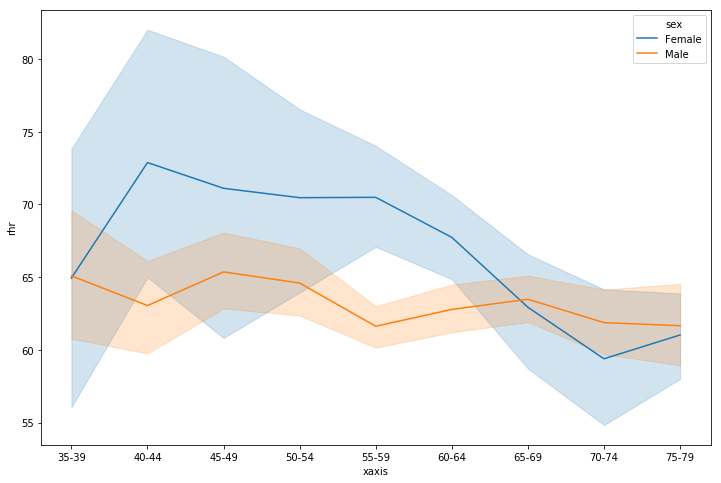

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['xaxis'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='xaxis', y='rhr', hue='sex', data=df, ci=95)
_ = plt.xticks(np.arange(len(labels)), labels)

Text(0.5,0,'Gender')

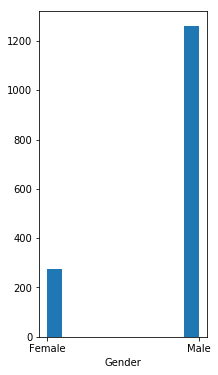

In [35]:
plt.figure(figsize=(3, 6))
plt.hist(df.sex);
plt.xlabel('Gender')

#df[df.sex=='Female'].count()
#df[df.sex=='Male'].count()


### Clinical Conclusion
Answer the following prompts to draw a conclusion about the data.
> 1. For women, we see .... 
> 2. For men, we see ... 
> 3. In comparison to men, women's heart rate is .... 
> 4. What are some possible reasons for what we see in our data?
> 5. What else can we do or go and find to figure out what is really happening? How would that improve the results?
> 6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?


## Observations

1. For women, the data shows RHR starting at 65 for 35-39, reaching a plateau for 40-44 thru 50-54 of 73-71 RHR then trending downwards back towards 61 at 75-79 age. The confidence ranges are large at 40-44 (17 RHR) and 45-49 (18 RHR) but do show a plateau. 
2. For men, the data shows a gradual trend of RHR starting at 65 for 35-39 years old and slowly moving to approximately 62 RHR for ages 75-79. With the confidence level included, we see a slight trend through time downwards. The confidence band is about 9 RHR wide at 35-39 and narrows significantly at 55-59 age but again widen to about 7 HRH at 75-79. Genereally we could consider this modeled well on mean RHR as a slightly downward line from 65 to 62. 
3. In comparison to men, women's heart rate is three things. 1) Less stable over time only varying more significantly. 2) Show a plateau that men's heart rates do not show. 3) Contains significantly more variance than men's heart rates at the 95% confidence level.
4. What are some possible reasons for what we see in our data? Part of the variance can be due to sample size. Looking at the data there are 277 female subjects and 1260 male subjects. This would account for smaller confidence ranges. Having more female subjects would improve the confidence ranges and continue to test if the plateau remains as prominent.
5. What else can we do or go and find to figure out what is really happening? How would that improve the results? It would also help to better understand how to define resting heart rate. Given these are 24 hour studies, we are likely analyzing sleep periods for the 5th percentile capture. There may be phyisological differences in sleep heart rates that are inadverently entering into this analysis. Understanding what periods of time subjects were awake then extracting data from only those times may help remove some variance due to sleep heart rythyms. We could review if there is timestamp data and consider data filtering around that. Tracking each individuals heart rate throughout the 24 hours, we could detect possible sleep periods and remove them from the analysis.
Also reviewing the data at difference confidence levels shows some significant changes to the absolute values but does not generally change the trending of the averages. So changing the confidence level itself doesn't fundamentally change the analysis. A 2 percentile shows lower overall values and higher confidence ranges but still shows the same trends as does 10th percentile and 20th percentile. Changing the sampling percentage is not a factor that provides additional insight other than to show the average RHR lowering or rising somewhat based on the sampling percentile.

6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? The trend was partly validated for females however there is only one sample prior to the plateau. Given how the data has jitters it would be more confident if there was a another age sample at 30-34 to validate the plateau better. The male data shows a downward trend but is not showing in the 35-39 data that it is reaching a peak in the 40's ages. Earlier age bands would be required to confirm if there is a plateau for male RHR.